# Feature detection em OpenCV


Exemplos extraídos do tutorial  [Scipy4CV ministrado por Thiago Santos no Simpósio Brasileiro de Computação Gráfica e Processamento de Imagens](https://github.com/thsant/scipy4cv)

Referências para este assunto:

[Computer Vision - Algorithms and Applications. Richard Szeliski](http://szeliski.org/Book/)
- Capítulo 3 - Image processing
- Capítulo 4 - Feature Detectors and Matching
    
[Capítulo 2 - Local Image Descriptors do Livro de Python/OpenCV de Jan Solem](http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf)




In [2]:
import cv2

import matplotlib.pyplot as plt

import matplotlib.cm as cm

from math import pi

%matplotlib inline


3.4.0


## Deteção de Features 2D

Neste exemplo as features do tipo GFTT, SIFT e SURF são calculadas na OpenCV




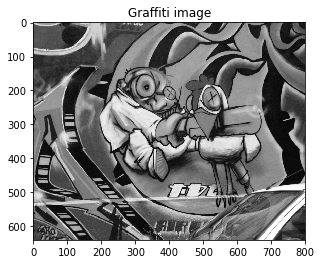

In [3]:
graffiti = cv2.imread('graffiti.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(graffiti, cmap=cm.gray)
plt.title('Graffiti image')



Em Python a função GFTT da OpenCV retorna os pontos 2D num array do Numpy. 



Matriz com os keypoints tem (2000, 1, 2)


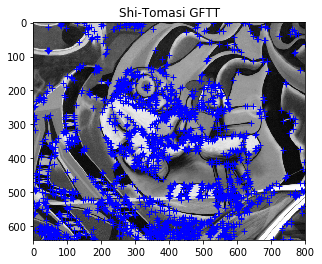

In [4]:
kpts_gftt = cv2.goodFeaturesToTrack(graffiti, 2000, 0.01, 3) # kpts_gftt são os keypoints retornados
print("Matriz com os keypoints tem {0}".format(kpts_gftt.shape))
# Os slices separam a posição x e a posição y dos keypoints. A dimensão 1 não é usada
plt.plot(kpts_gftt[:,:,0], kpts_gftt[:,:,1], 'b+')
plt.imshow(graffiti, cmap=cm.gray)
plt.title('Shi-Tomasi GFTT')


De acordo com o código anterior, a função GFTT da OpenCV deverá retornar até 2000 cantos encontrados na imagem (os cantos são as features neste caso). As features retornadas deverão ter um espaçamento de 3 pixels. O valor 0.01 é um parâmetro de qualidade definido sobre os autovalores usados para gerar as features (mais detalhes na  [documentação da OpenCV](http://docs.opencv.org/modules/imgproc/doc/feature_detection.html?highlight=goodfeaturestotrack#cv2.goodFeaturesToTrack))

As features são retornadas como um array do Numpy de tamanho $2000 \times 1 \times 2$ e o slicing é necessário para podermos separar as coordenadas $x$ e $y$ para usar na função *plot*.

O argumento `b+` faz com que os pontos sejam plotados como cruzes azuis.



## Features SIFT e SURF
  
 
- As características do tipo SIFT e SURF guardam informação sobre dimensão, diferentemente da GFTT
- São *features* multi escala definidas sobre uma *vizinhança* na imagem, são features [multi-escala](http://dx.doi.org/10.1561/0600000017)
- Estas features vêm armazenadas numa estrutura `Keypoint`
    - `Keypoint.pt` armazena a localização da feature
    - `Keypoint.size` armazena o diâmetro da vizinhança em que a *feature* faz sentido



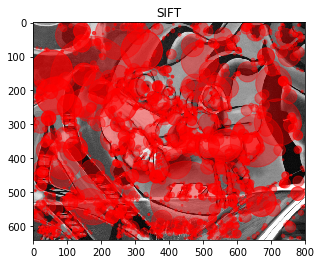

In [7]:
sift = cv2.xfeatures2d.SIFT_create()
kpts = sift.detect(graffiti)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
# s will correspond to the neighborhood area
s = [(k.size/2)**2 * pi for k in kpts]
plt.scatter(x, y, s, c='r', alpha=0.4)
plt.imshow(graffiti, cmap=cm.gray)
plt.title('SIFT')

No código acima, o parâmetro `alpha` é emrpegado para criar um *plot* usando uma transparência de 40%, permitindo que se possa ver a imagem que está atrás dos círculos.

O parâmetro `r` especifica que o *plot* seja em vermelho

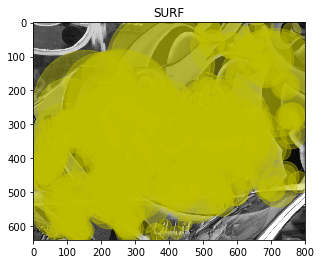

In [15]:
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=7000)
kpts = surf.detect(graffiti)
x = [k.pt[0] for k in kpts]
y = [k.pt[1] for k in kpts]
s = [(k.size/2)**2 * pi for k in kpts]
plt.scatter(x, y, s, c='y', alpha=0.4)
plt.imshow(graffiti, cmap=cm.gray)
plt.title('SURF')